# UC00181_Factors_Impact_on_Student_Performance

Thai Ha NGUYEN

Email: s224082764@deakin.edu.au

## 1. Scenario

As a data analyst working for the Victorian Department of Education. Your team has been tasked with analyzing the PISA 2022 results for Victorian students to identify key insights about student performance, engagement, and educational outcomes. This analysis will inform policy decisions and educational strategies for improving student outcomes across Victoria.

The Minister of Education has requested a comprehensive analysis that can be presented to stakeholders and integrated into the Ministry of Education Platform (MOP) for ongoing monitoring and decision-making.

## 2. What This Use Case Will Teach You

By the end of Sprint 1, you will have learned how to:

- **Data Wrangling**: Clean and prepare complex educational survey data from SPSS format
- **Environment Setup**: Establish a professional data science workflow using GitHub and Python
- **Domain Knowledge**: Understand PISA assessment framework and educational metrics
- **Data Quality Assessment**: Identify and handle missing data, outliers, and inconsistencies
- **Exploratory Data Analysis**: Conduct initial investigations to understand data patterns
- **Documentation**: Create clear, reproducible analysis documentation
- **Collaboration**: Set up workflows for integration with web development teams
- **Project Management**: Structure a data science project for iterative development

## 3. Background and Introduction

### PISA Overview
The Programme for International Student Assessment (PISA) is a triennial international survey conducted by the OECD that evaluates education systems worldwide. PISA 2022 assessed 15-year-old students' capabilities in:
- Reading literacy
- Mathematical literacy  
- Scientific literacy
- Creative thinking (new domain in 2022)

### Victorian Education Context
Victoria participates in PISA as part of Australia's commitment to international educational benchmarking. The results help inform:
- Curriculum development
- Teacher training programs
- Resource allocation
- Educational policy decisions

### Project Significance
This analysis will provide evidence-based insights to support Victorian educational excellence and identify areas for improvement in student outcomes.

## 4. Dataset Introduction

### Dataset Overview
- **Name**: PISA 2022 Student Questionnaire - Victoria, Australia Subset
- **Format**: SPSS (.sav) file
- **Scope**: 15-year-old students from Victorian schools
- **Assessment Year**: 2022
- **Data Collection**: Conducted between March-August 2022

### Key Components
The dataset contains multiple dimensions of student data:

**Performance Measures:**
- Reading, Mathematics, and Science plausible values
- Creative thinking assessment scores
- Domain-specific subscale scores

**Student Background:**
- Socioeconomic status indicators
- Home language and cultural background
- Family structure and parental education
- Immigration status and length of residence

**School Context:**
- School type (government, Catholic, independent)
- School location (metropolitan, regional, remote)
- School size and resources
- Teacher qualifications and experience

**Learning Environment:**
- Student attitudes toward subjects
- Motivation and engagement measures
- Learning strategies and study habits
- Technology use and digital literacy

### Data Structure Expectations
- Approximately 600-800 Victorian student records
- 500+ variables covering assessment scores and questionnaire responses
- Hierarchical structure (students nested within schools)
- Complex survey design with sampling weights

## 5. Importing Datasets

### 5.1 Environment Setup

#### Required Libraries

In [15]:
# Core data manipulation
import pandas as pd
import numpy as np

# SPSS file handling
import pyreadstat

# Statistical analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data quality
from ydata_profiling import ProfileReport

# Version control integration
import os
from datetime import datetime

### 5.2 Data Import Process

#### Loading SPSS Data

In [16]:
def load_pisa_data(file_path):
    """
    Load PISA 2022 SPSS dataset with proper handling of metadata
    """
    # Read SPSS file with metadata
    df, meta = pyreadstat.read_sav(file_path)
    
    # Store variable labels for documentation
    variable_labels = meta.column_labels
    value_labels = meta.value_labels
    variable_value_labels = meta.variable_value_labels

    return df, variable_labels, value_labels, variable_value_labels

# Load the dataset
pisa_data, var_labels, val_labels, variable_value_labels = load_pisa_data('SPSS2022VIC.sav')

In [17]:
# Check the structure of variable labels
print("Type of var_labels:", type(var_labels))
print("First few items:", var_labels[:5] if isinstance(var_labels, list) else "Not a list")

# Check the structure of value labels
print("Type of val_labels:", type(val_labels))
print("Available keys in val_labels (first 10):", list(val_labels.keys())[:10])
print("Available keys in variable_value_labels (first 10):", list(variable_value_labels.keys())[:10])

# Check the structure of 15th variable's value labels
print("Type of 5th variable's value labels:", type(variable_value_labels.get(list(variable_value_labels.keys())[33], [])))
print("5th variable's value labels (first 5):", list(variable_value_labels.get(list(variable_value_labels.keys())[33], {}).items())[:5])


Type of var_labels: <class 'list'>
First few items: ['Country code 3-character', 'Country Identifier', 'Intl. School ID', 'Intl. Student ID', 'PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)']
Type of val_labels: <class 'dict'>
Available keys in val_labels (first 10): ['labels0', 'labels1', 'labels2', 'labels3', 'labels4', 'labels5', 'labels6', 'labels7', 'labels8', 'labels9']
Available keys in variable_value_labels (first 10): ['CNT', 'CNTRYID', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG']
Type of 5th variable's value labels: <class 'dict'>
5th variable's value labels (first 5): [(1.0, 'None'), (2.0, 'One'), (3.0, 'Two'), (4.0, 'Three or more'), (95.0, 'Valid Skip')]


#### Initial Data Inspection

In [18]:
# Basic dataset information
print(f"Dataset shape: {pisa_data.shape}")
print(f"Number of students: {pisa_data.shape[0]}")
print(f"Number of variables: {pisa_data.shape[1]}")

# Preview first few rows
display(pisa_data.head())

# Data types overview
print("\nData types summary:")
print(pisa_data.dtypes.value_counts())

Dataset shape: (2226, 1279)
Number of students: 2226
Number of variables: 1279


,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT,test
0,AUS,36.0,3600669.0,3600004.0,08MS,003600,AUS08,0360000,3600.0,1.0,...,309.260,276.532,294.033,344.479,239.871,291.530,446.273,0.64909,02MAY23:09:32:29,NaN
1,AUS,36.0,3600280.0,3600022.0,08MS,003600,AUS09,0360000,3600.0,1.0,...,624.878,689.692,615.668,620.858,615.082,679.840,655.120,0.62780,02MAY23:09:32:29,NaN
2,AUS,36.0,3600333.0,3600035.0,08MS,003600,AUS09,0360000,3600.0,1.0,...,285.853,331.044,376.079,383.640,352.415,369.133,291.992,0.57973,02MAY23:09:32:29,NaN
3,AUS,36.0,3600017.0,3600049.0,08MS,003600,AUS09,0360000,3600.0,1.0,...,473.071,396.796,436.960,425.168,414.202,364.583,472.448,0.47659,02MAY23:09:32:29,NaN
4,AUS,36.0,3600350.0,3600059.0,08MS,003600,AUS09,0360000,3600.0,1.0,...,331.669,399.699,361.383,301.752,330.689,334.126,253.802,0.66969,02MAY23:09:32:29,NaN



Data types summary:
float64    1261
object       18
Name: count, dtype: int64


## 6. Exploratory Data Analysis (EDA)

### 6.1 Data Quality Assessment

#### Missing Data Analysis


Variables with more than 80% missing values:
                    Column  Missing_Count  Missing_Percentage
test                  test           2226          100.000000
CREATOR            CREATOR           2226          100.000000
LANGTEST_PAQ  LANGTEST_PAQ           2226          100.000000
Option_CT        Option_CT           2226          100.000000
Option_FL        Option_FL           2226          100.000000
...                    ...            ...                 ...
ST261Q05JA      ST261Q05JA           2087           93.755615
ST261Q01JA      ST261Q01JA           2086           93.710692
ST261Q11JA      ST261Q11JA           2084           93.620845
ST261Q08JA      ST261Q08JA           2076           93.261456
ST021Q01TA      ST021Q01TA           1828           82.120395

[458 rows x 3 columns]

Data shape after cleaning:
(2226, 821)


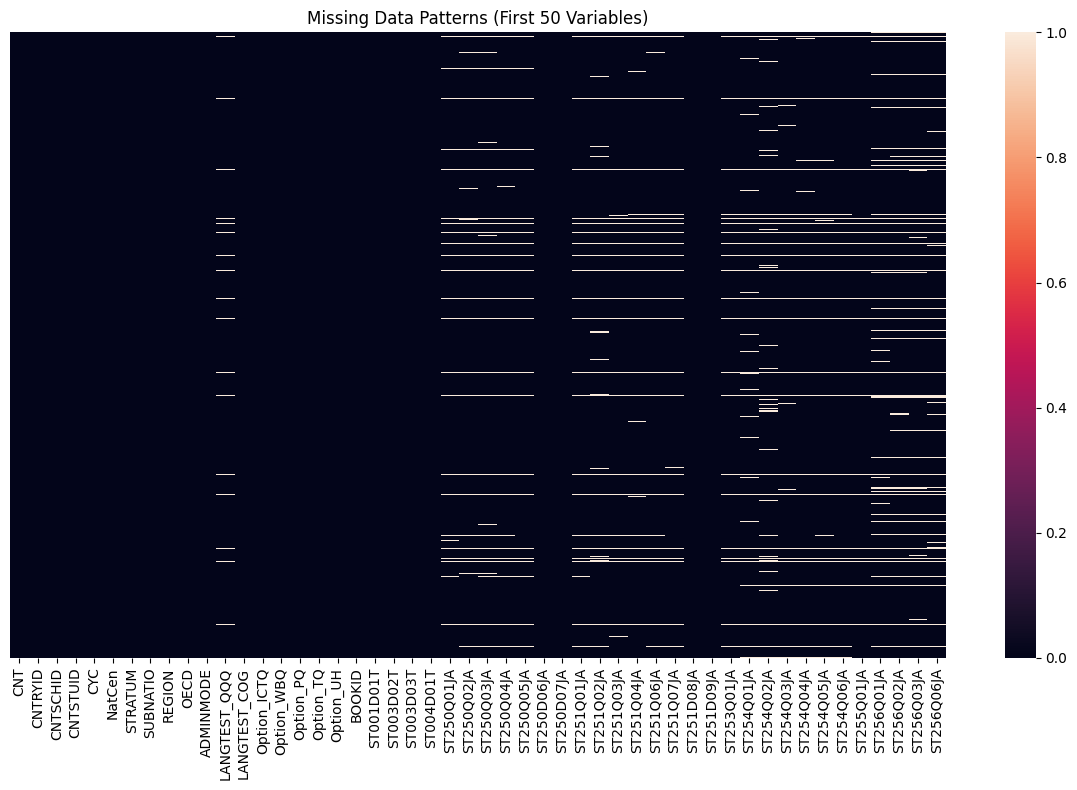

In [19]:
# Calculate missing data percentages
missing_summary = pd.DataFrame({
    'Column': pisa_data.columns,
    'Missing_Count': pisa_data.isnull().sum(),
    'Missing_Percentage': (pisa_data.isnull().sum() / len(pisa_data)) * 100
})

missing_summary = missing_summary[missing_summary['Missing_Percentage'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

# Major missing values variables
major_missing_vars = missing_summary[missing_summary['Missing_Percentage'] > 80]
print("\nVariables with more than 80% missing values:")
print(major_missing_vars)

# Remove columns with excessive missing values
pisa_data_cleaned = pisa_data.drop(columns=major_missing_vars['Column'])

# Data shape after cleaning
print("\nData shape after cleaning:")
print(pisa_data_cleaned.shape)

# Visualize missing data patterns
plt.figure(figsize=(12, 8))
sns.heatmap(pisa_data_cleaned.isnull().iloc[:, :50], cbar=True, yticklabels=False)
plt.title('Missing Data Patterns (First 50 Variables)')
plt.tight_layout()
plt.show()

#### Data Distribution Analysis

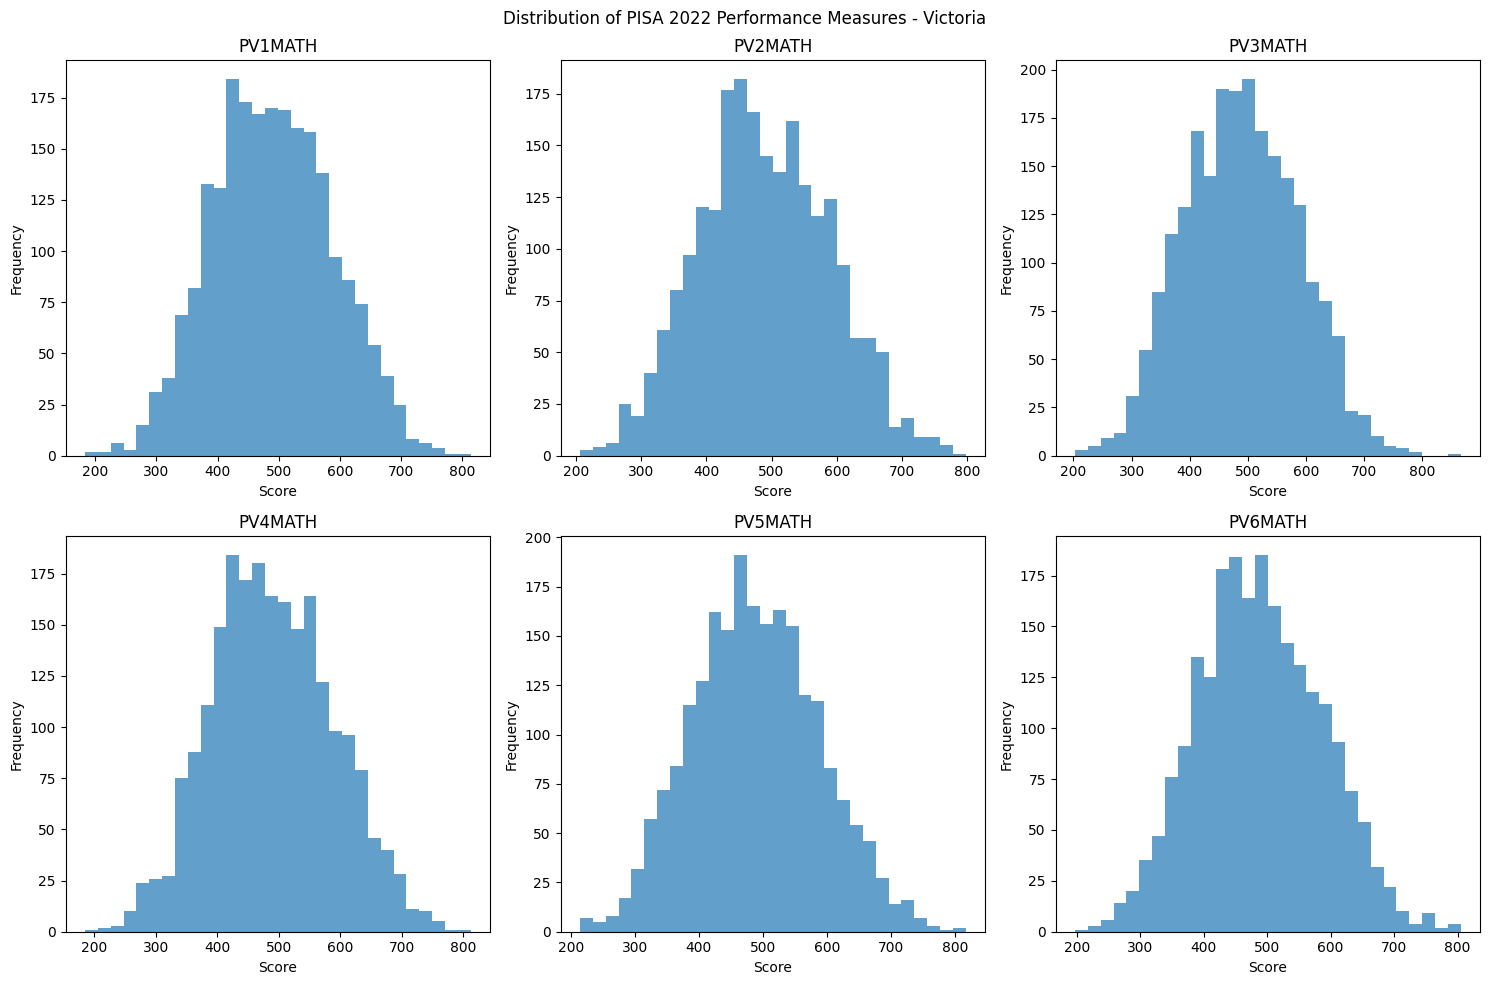

In [20]:
# Identify key performance variables
performance_vars = [col for col in pisa_data_cleaned.columns if 'PV' in col and any(domain in col for domain in ['READ', 'MATH', 'SCIE'])]

# Create distribution plots for performance measures
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of PISA 2022 Performance Measures - Victoria')

for i, var in enumerate(performance_vars[:6]):
    row, col = i // 3, i % 3
    axes[row, col].hist(pisa_data[var].dropna(), bins=30, alpha=0.7)
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 6.2 Demographic Analysis

#### Student Background Overview

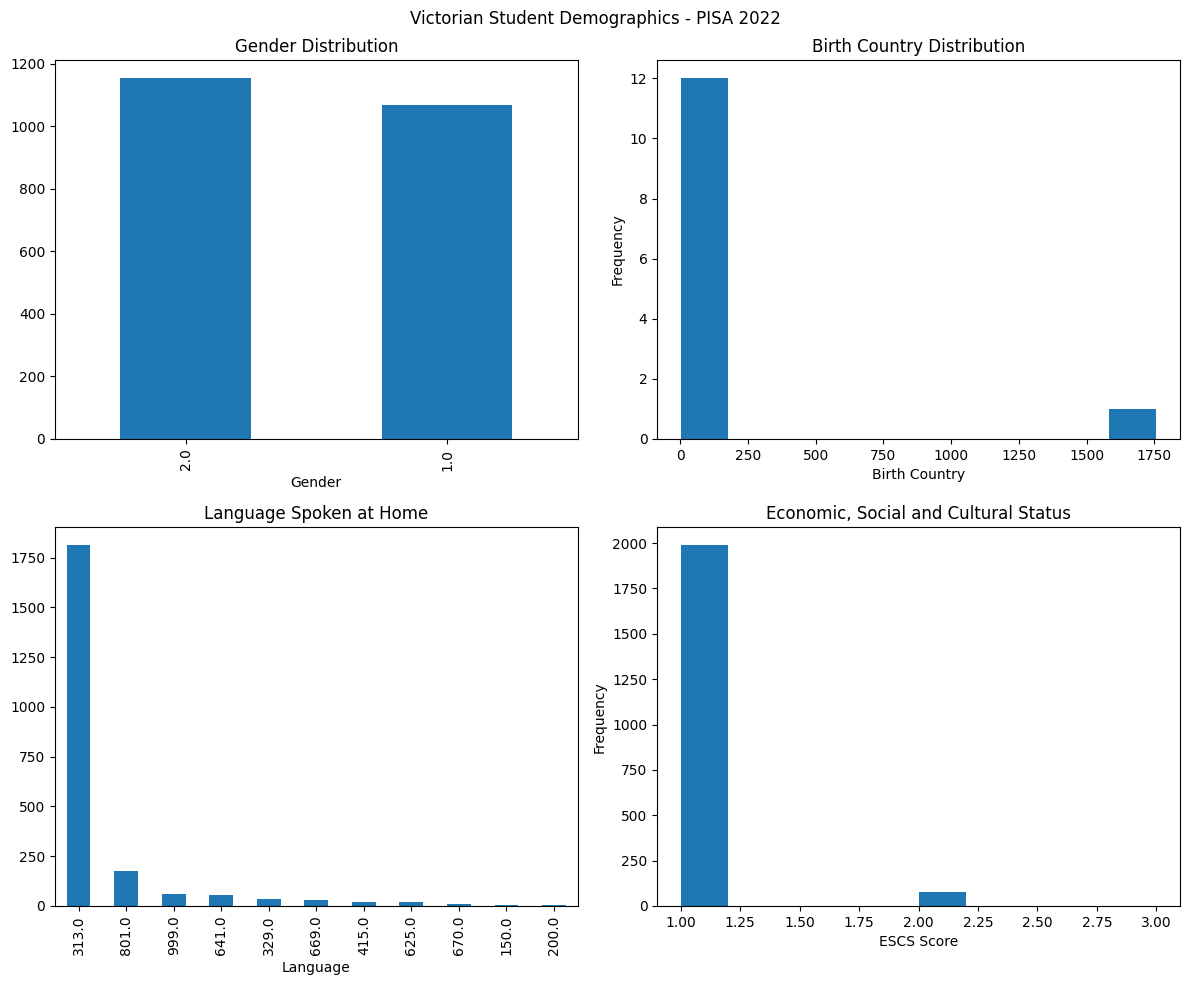

In [21]:
# Analyze key demographic variables
demographic_vars = ['ST004D01T', 'COBN_S', 'LANGN', 'ESCS']  # Gender, birth country, language, SES

# Create demographic summary
demo_summary = {}
for var in demographic_vars:
    if var in pisa_data_cleaned.columns:
        demo_summary[var] = pisa_data_cleaned[var].value_counts()
        
# Visualize demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Victorian Student Demographics - PISA 2022')

# Gender distribution
if 'ST004D01T' in pisa_data_cleaned.columns:
    pisa_data_cleaned['ST004D01T'].value_counts().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Gender Distribution')
    axes[0,0].set_xlabel('Gender')

# Add other demographic plots...
if 'COBN_S' in pisa_data_cleaned.columns:
    pisa_data_cleaned['COBN_S'].value_counts().plot(kind='hist', ax=axes[0,1])
    axes[0,1].set_title('Birth Country Distribution')
    axes[0,1].set_xlabel('Birth Country')

if 'LANGN' in pisa_data_cleaned.columns:
    pisa_data_cleaned['LANGN'].value_counts().plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Language Spoken at Home')
    axes[1,0].set_xlabel('Language')

if 'ESCS' in pisa_data_cleaned.columns:
    pisa_data_cleaned['ESCS'].value_counts().plot(kind='hist', ax=axes[1,1])
    axes[1,1].set_title('Economic, Social and Cultural Status')
    axes[1,1].set_xlabel('ESCS Score')

plt.tight_layout()
plt.show()

### 6.3 Performance Analysis

#### Subject Performance Comparison

{'PV1READ': np.float64(502.89360017969454), 'PV1MATH': np.float64(489.6365265049416), 'PV1SCIE': np.float64(507.86893980233594)}


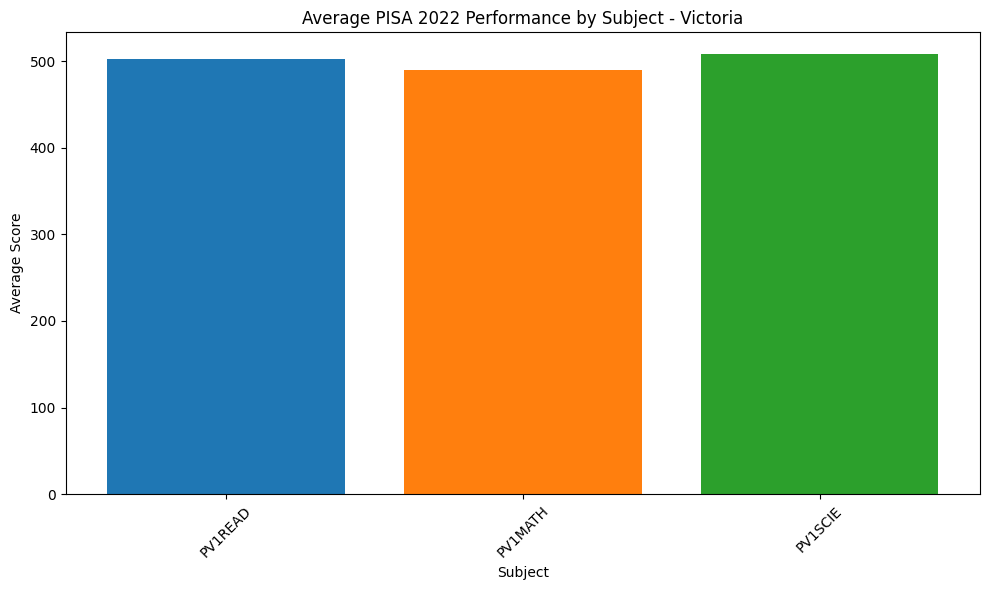

In [29]:
# Calculate mean performance by subject
subjects = ['PV1READ', 'PV1MATH', 'PV1SCIE']
performance_summary = {}

for subject in subjects:
    mean_vars = pisa_data_cleaned[subject].dropna().mean()
    if mean_vars:
        performance_summary[subject] = mean_vars

print(performance_summary)

# Bar plot of performance summary
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(performance_summary.keys(), performance_summary.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average PISA 2022 Performance by Subject - Victoria')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
